# Data Extraction, Cleanup, Analysis and Predictions 

# Extraction 
Data Scraped from zocdoc.com.<br>
All Primary Care Physicians in Manhattan; their Reviews and Ratings

In [117]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn
%matplotlib inline

In [111]:
path_to_data = '/Users/Santosh/PROJECTS/ZOCDOC_ML/DATA/' 

In [112]:
docData = pd.read_csv(path_to_data + 'zocdocData2.csv')

####112,184 samples and 9 features

In [114]:
docData.shape

(112184, 9)

#### Three types of Ratings:
     Overall, Bedside Manners, Wait Time
#### Review as Text

In [115]:
docData.head(2)

,DocName,DocDegree,Location,PatientName,ReviewDate,OverallRating,BedsideMannerRating,WaitTimeRating,Review
0,Dr. Liana Dao,MD,New York NY,Ashley M. (Verified Patient),April 7 2015,5,5,5,Liana Dao is amazing ! She made me feel totall...
1,Dr. Liana Dao,MD,New York NY,a Verified Patient,April 6 2015,5,5,5,I was in a jam and couldn't get to my regular ...


#### Average Ratings are all above 4.3 -> More number of positive ratings
#### Data is Skewed.

In [130]:
docData.describe()

,OverallRating,BedsideMannerRating,WaitTimeRating
count,112184.000000,112184.000000,112184.000000
mean,4.638932,4.687585,4.312130
std,0.911242,0.794147,0.832047
min,1.000000,1.000000,1.000000
25%,5.000000,5.000000,4.000000
50%,5.000000,5.000000,4.000000
75%,5.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000


#### Worst Rated Doctors

In [132]:
docData[['DocName', 'OverallRating', 'BedsideMannerRating', 'WaitTimeRating']].groupby('DocName').mean().sort('OverallRating', ascending=True).head(5)

,OverallRating,BedsideMannerRating,WaitTimeRating
DocName,,,
Dr. Joseph Fedrick,2.000000,2.000000,1.000000
Dr. Amer Syed,3.000000,4.500000,1.000000
Dr. Samir Amin,3.000000,4.200000,3.000000
Dr. Provat Das,3.307692,3.230769,3.307692
Dr. Michael Aziz,3.380000,3.540000,3.960000


#### Let's see the Number of Reviews for worst Rated Doctors
#### Some of them have more number of reviews "650", some have really less "2"

In [35]:
def mean(series):
    " " " Returns the avg of the panda Series " " "
    return series.mean()
def count(series):
    " " " Returns the avg of the panda Series " " "
    return series.count()
docData[['DocName', 'OverallRating', 'BedsideMannerRating', 'WaitTimeRating', 'Review']].groupby('DocName').agg({'OverallRating': mean, 'BedsideMannerRating': mean, 'WaitTimeRating': mean, 'Review': count }).sort('OverallRating', ascending=True).head(20)

,OverallRating,Review,BedsideMannerRating,WaitTimeRating
DocName,,,,
Dr. Joseph Fedrick,2.000000,2,2.000000,1.000000
Dr. Amer Syed,3.000000,2,4.500000,1.000000
Dr. Samir Amin,3.000000,5,4.200000,3.000000
Dr. Provat Das,3.307692,13,3.230769,3.307692
Dr. Michael Aziz,3.380000,650,3.540000,3.960000
Dr. Napoleon Savescu,3.454545,33,3.636364,2.818182
Dr. Elizabeth Muss,3.454545,176,3.454545,3.727273
Dr. Peter Agho,3.500000,72,4.000000,3.875000
Dr. David Mack,3.588235,85,3.941176,3.058824


#### How about Total Number of reviews available for each Rating value
#### Seems that Lots of People rate the doctors high
#### DocName count is same as Reviews count except for Rating = 5
####   Implies that people who rated < 5 wrote a review
#### Bedside Manner rating is proportional to Overall Rating, however, Wait time has lesser standard deviation. Even Good doctors are late!

In [141]:
docData[['DocName', 'OverallRating', 'BedsideMannerRating', 'WaitTimeRating', 'Review']].groupby('OverallRating').agg({'OverallRating': mean, 'BedsideMannerRating': mean, 'WaitTimeRating': mean, 'Review': count, 'DocName': count }).sort('OverallRating', ascending=True).head(20)

,DocName,OverallRating,Review,BedsideMannerRating,WaitTimeRating
OverallRating,,,,,
1,3274,1,3274,1.760232,3.211057
2,3570,2,3570,2.674230,3.457423
3,3282,3,3282,3.517063,3.382693
4,10136,4,10136,4.387135,3.895916
5,91922,5,91910,4.944964,4.463621


####Doctors from Bronx etc are low rated than Long Island Doctors.
#### Location plays some importance

In [38]:
docData[['Location', 'OverallRating', 'BedsideMannerRating', 'WaitTimeRating', 'Review']].groupby('Location').agg({'OverallRating': mean, 'BedsideMannerRating': mean, 'WaitTimeRating': mean, 'Review': count }).sort('OverallRating', ascending=True).head(20)

,OverallRating,Review,BedsideMannerRating,WaitTimeRating
Location,,,,
Bronx NY,4.340755,1033,4.403679,3.647628
North Bergen NJ,4.344828,29,4.551724,3.827586
Dumont NJ,4.434783,23,4.521739,3.956522
Jersey City NJ,4.451319,3297,4.571125,4.070064
Huntington NY,4.550000,40,4.650000,4.775000
Astoria NY,4.555006,808,4.614339,4.074166
Brooklyn NY,4.614751,6910,4.679682,4.142878
Teaneck NJ,4.641026,39,4.717949,4.102564
New York NY,4.647635,98182,4.693068,4.338891


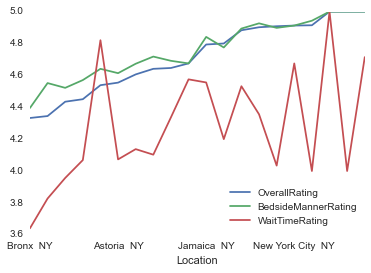

In [169]:
docData[['Location', 'OverallRating', 'BedsideMannerRating', 'WaitTimeRating', 'Review']].groupby('Location').agg({'OverallRating': mean, 'BedsideMannerRating': mean, 'WaitTimeRating': mean }).sort('OverallRating', ascending=True).plot()

### Cleanup

In [170]:
docData = docData.dropna()

In [171]:
docData.count()

DocName                111241
DocDegree              111241
Location               111241
PatientName            111241
ReviewDate             111241
OverallRating          111241
BedsideMannerRating    111241
WaitTimeRating         111241
Review                 111241
dtype: int64

### Feature Creation
#### To Predict Ratings from 1 to 5 from Reviews, model will need to be either using Linear Regression OR Multi Classification
#### Linear Regression with Polynomial Features turns out to be slow
#### Multiclassifiction is not yet explored
#### So I created a new metric isGood, it measures if a patient is satisfied or not
####  If a user rates 4 or 5 he is satisfied

In [172]:
# Create a feature for isGood
# Assumption:
# Reviews Rated 4,5 are good
# Reviews Rated 1,2,3 are bad
docData['isGood'] = docData.OverallRating.apply(lambda x: x-3 >0)

In [173]:
docData.head(1)

,DocName,DocDegree,Location,PatientName,ReviewDate,OverallRating,BedsideMannerRating,WaitTimeRating,Review,isGood
0,Dr. Liana Dao,MD,New York NY,Ashley M. (Verified Patient),April 7 2015,5,5,5,Liana Dao is amazing ! She made me feel totall...,True


#### Added another feature ReviewWordCount that counts total number of words in each review

In [174]:
docData['ReviewWordCount'] = docData['Review'].apply(lambda x: len(x.split()))
docData.head(1)

,DocName,DocDegree,Location,PatientName,ReviewDate,OverallRating,BedsideMannerRating,WaitTimeRating,Review,isGood,ReviewWordCount
0,Dr. Liana Dao,MD,New York NY,Ashley M. (Verified Patient),April 7 2015,5,5,5,Liana Dao is amazing ! She made me feel totall...,True,45


#### All 1,2,3 star ratings have review comments
#### Happier people sometimes simply rate and write no reviews

In [178]:
docData[docData.ReviewWordCount == 0].groupby('OverallRating').count()

,DocName,DocDegree,Location,PatientName,ReviewDate,BedsideMannerRating,WaitTimeRating,Review,isGood,ReviewWordCount
OverallRating,,,,,,,,,,
4,16,16,16,16,16,16,16,16,16,16
5,58,58,58,58,58,58,58,58,58,58


#### The unhappy you are, more you will ramble

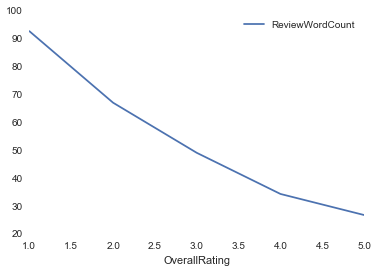

In [181]:
docData[['OverallRating',  'ReviewWordCount']].groupby('OverallRating').mean().plot()

#### Let's create features for review words using Count Vectorizer. We will ignore stopwords.
#### It is a unigram with 5000 features

In [183]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
cv = CountVectorizer(stop_words='english', ngram_range=(1, 1), max_features=5000)

In [184]:
reviewCV = cv.fit_transform(docData.Review)

In [185]:
type(reviewCV)
type(docData.Review)

pandas.core.series.Series

In [186]:
cv.get_feature_names()

[u'00',
 u'08am',
 u'10',
 u'100',
 u'10am',
 u'10min',
 u'10mins',
 u'11',
 u'12',
 u'13',
 u'13th',
 u'14',
 u'15',
 u'15am',
 u'15min',
 u'15mins',
 u'15pm',
 u'17',
 u'1hour',
 u'1hr',
 u'1pm',
 u'1st',
 u'20',
 u'2001',
 u'2005',
 u'2014',
 u'20am',
 u'20mins',
 u'23',
 u'23rd',
 u'24',
 u'24hrs',
 u'25',
 u'25min',
 u'2nd',
 u'2pm',
 u'2x',
 u'30',
 u'30am',
 u'30min',
 u'30mins',
 u'30minutes',
 u'30pm',
 u'31',
 u'315',
 u'32nd',
 u'34th',
 u'35',
 u'35am',
 u'35min',
 u'36',
 u'3pm',
 u'3rd',
 u'40',
 u'40min',
 u'40mins',
 u'40pm',
 u'42nd',
 u'43',
 u'45',
 u'45ish',
 u'45min',
 u'45pm',
 u'47',
 u'47th',
 u'48',
 u'4pm',
 u'4th',
 u'50',
 u'50pm',
 u'5pm',
 u'5th',
 u'60',
 u'6months',
 u'70s',
 u'75',
 u'830am',
 u'835am',
 u'8am',
 u'8th',
 u'90',
 u'9am',
 u'aaa',
 u'aback',
 u'abd',
 u'abdominal',
 u'abilities',
 u'ability',
 u'able',
 u'abnormal',
 u'abortions',
 u'abrasive',
 u'abreast',
 u'abrupt',
 u'absent',
 u'absolute',
 u'absolutely',
 u'absurd',
 u'abuse',
 u'a

#### Classification techniques to predict if a review is Good Or Not
#### Linear Regression with Polynomial features gets too complicated and my system craps

In [187]:
docDataWReview = reviewCV.toarray()

In [188]:
docData.describe()

,OverallRating,BedsideMannerRating,WaitTimeRating,isGood,ReviewWordCount
count,111241.000000,111241.000000,111241.000000,111241,111241.000000
mean,4.637112,4.685557,4.309769,0.9091882,31.629399
std,0.913279,0.796568,0.833359,0.2873426,35.908436
min,1.000000,1.000000,1.000000,False,0.000000
25%,5.000000,5.000000,4.000000,1,10.000000
50%,5.000000,5.000000,4.000000,1,22.000000
75%,5.000000,5.000000,5.000000,1,40.000000
max,5.000000,5.000000,5.000000,True,606.000000


In [190]:
docData[docData.isGood == False].count().max()
# Total unSatisfied Patients

10102

In [86]:
#### Data is skewed towards higher ratings

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cross_validation import cross_val_score

In [88]:
%%time
# model = LogisticRegression(penalty='l1', C=100)
model = LogisticRegression()

CPU times: user 43 µs, sys: 1 µs, total: 44 µs
Wall time: 64.1 µs


In [89]:
%%time
X = docDataWReview
print cross_val_score(model, X, docData.isGood, cv=5, scoring='roc_auc').mean()

0.993868624941
CPU times: user 39.1 s, sys: 1min 35s, total: 2min 14s
Wall time: 2min 53s


In [90]:
print cross_val_score(model, X, docData.isGood, cv=5).mean()

0.98914974405


#### Super high accuracy !??? .... Data is skewed?
#### 91% of the data set has Good Rating as per our definition

In [95]:
print cross_val_score(model, X, docData.isGood, cv=5, scoring='precision').mean()
# Precision is important here.
# There are many positives in the real data. So we want to weigh the model against False positive.
# So that it avoids false positives.
# 98.98% precision means lesser false positives. Thus the model is not dumbly saying all cases as positives.

0.989782406241


In [92]:
print cross_val_score(model, X, docData.isGood, cv=5, scoring='recall').mean()

0.998378478425


In [102]:
model.fit(X, docData.isGood)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, penalty='l2', random_state=None, tol=0.0001)

In [103]:
coef = pd.Series(model.coef_[0], index=cv.get_feature_names())  # pair coefficients with feature names
coef.sort()  # sort from low to high

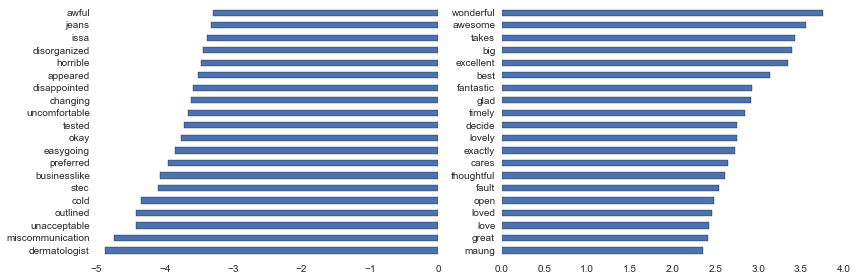

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
coef[:20].plot(kind='barh', ax=axes[0])
coef[-20:].plot(kind='barh', ax=axes[1])
f = plt.tight_layout()

#### Dermatologist is the worst word!?
#### May be some one went crazy on a review of a dermatologist
####  OR most dermatologists are rated low in the dataset we have
#### Try tfid to normalize the weights. Taking away pressure from most recurring words
#### Try trigrams. It is showing fault as a positive word. May be it was "not his fault"

#===============================#
#### Efforts for Linear Regression with Polynomial Features to predict actual Rating.
#### Too slow. out of memory
#### Need to look at Multi classification to classify as [1,5] instead of a continuous rating between [1,5]

In [93]:
cross_val_score?

In [24]:
features = ['DocName','DocDegree', 'Location','PatientName','ReviewDate']

In [25]:
docDataWReview = np.hstack([docData[features], reviewCV.toarray()])

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [31]:
def analyze_performance(test_model):
    X = docDataWReview
    y_sample = docData.OverallRating
    scores = {'overfit': {}, 'cv': {}}
    for degree in xrange(3, 4):
        model = make_pipeline(PolynomialFeatures(degree), test_model)    
        scores['overfit'][degree] = model.fit(X, y_sample).score(X, y_sample)
        print scores['overfit'][degree]
        cv_scores = []
       # for k in xrange(2):  # Compute a few R2 scores and print average performance
        #    X_train, X_test, y_train, y_test = train_test_split(X, y_sample, train_size=.7)
        #    cv_scores.append(model.fit(X_train, y_train).score(X_test, y_test))
       # scores['cv'][degree] = np.mean(cv_scores)
    return pd.DataFrame(scores)

In [33]:
X = docDataWReview
y_sample = docData.OverallRating

In [34]:
model = make_pipeline(PolynomialFeatures(3), Lasso(alpha=10))

In [ ]:
score = model.fit(X, y_sample).score(X, y_sample)

In [ ]:
print score

In [ ]:
#test_models = [LinearRegression(), Ridge(alpha=10), Lasso(alpha=10)]
test_models = [Lasso(alpha=10)]
scores = [analyze_performance(my_model) for my_model in test_models]